In [61]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm,datasets,LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

ImportError: cannot import name 'LinearSVC' from 'sklearn' (/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/__init__.py)

In [2]:
df = pd.read_csv("result_002.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,rate,p,n
0,-2.13,-1.75,0.25,-0.63,-2.50,-0.63,0.50,-0.75,-0.50,-2.88,...,2.75,-19.50,-10.13,36.75,6.00,-10.00,0.997101,0,0,1
1,-2.00,-1.75,0.12,-0.50,-2.50,-0.63,0.63,-0.88,-0.88,-2.88,...,2.88,-2.00,26.75,2.88,-11.63,-0.63,0.942694,0,0,1
2,-2.00,-1.88,0.00,-0.75,-2.50,-0.37,0.50,-1.00,-0.75,-2.75,...,2.75,31.62,4.88,-0.37,-4.25,-16.75,0.891151,1,0,1
3,-2.13,-1.88,0.12,-0.75,-2.38,-0.63,0.37,-0.88,-0.63,-2.88,...,2.50,-0.50,-8.88,-14.50,-36.38,-8.75,0.842514,0,0,0
4,-2.00,-1.88,0.12,-0.63,-2.38,-0.63,0.50,-0.88,-0.88,-2.63,...,2.75,-9.88,-0.12,-42.75,-4.25,27.12,0.796384,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,-2.38,-2.50,-0.63,-2.25,-3.63,-1.37,-0.12,-1.00,-0.12,-2.13,...,2.38,-14.88,-8.50,5.25,-11.13,0.50,1.249410,0,0,0
5804,-2.38,-2.63,-0.75,-2.38,-3.50,-1.50,-0.75,-1.12,0.00,-2.13,...,2.25,11.13,-10.63,-14.63,-21.25,-14.88,1.218278,1,0,0
5805,-2.50,-2.50,-0.63,-2.25,-3.63,-1.25,-0.50,-1.12,0.12,-2.13,...,2.38,0.75,-20.75,-4.88,27.00,-5.63,1.174835,0,0,1
5806,-2.38,-2.63,-0.75,-2.13,-3.75,-1.12,-0.50,-1.25,0.00,-2.00,...,2.50,0.88,14.75,-10.38,-9.88,-2.13,1.123463,1,0,0


In [3]:
df=df.drop(columns=['30','31','32','33','34','35','36'])

In [4]:
scaler=MinMaxScaler()
for i in range(0,30):
    scaler.fit(df[['{}'.format(i)]])
    df[['{}'.format(i)]]=scaler.transform(df[['{}'.format(i)]])

df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,rate,p,n
0,0.596774,0.892857,0.904,0.877934,0.788571,0.724638,0.766871,0.663717,0.364964,0.087591,...,0.500,0.668449,0.766871,0.691358,0.382716,0.548,0.613497,0,0,1
1,0.806452,0.892857,0.800,0.938967,0.788571,0.724638,0.846626,0.548673,0.087591,0.087591,...,0.500,0.465241,0.306748,0.228395,0.382716,0.648,0.533742,0,0,1
2,0.806452,0.776786,0.704,0.821596,0.788571,0.913043,0.766871,0.442478,0.182482,0.182482,...,0.745,0.203209,0.539877,0.456790,0.537037,0.648,0.766871,1,0,1
3,0.596774,0.776786,0.800,0.821596,0.857143,0.724638,0.687117,0.548673,0.270073,0.087591,...,0.310,0.401070,0.539877,0.617284,0.537037,0.848,0.766871,0,0,0
4,0.806452,0.776786,0.800,0.877934,0.857143,0.724638,0.766871,0.548673,0.087591,0.270073,...,0.310,0.331551,0.386503,0.456790,0.925926,0.648,0.380368,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,0.193548,0.223214,0.200,0.117371,0.142857,0.188406,0.386503,0.442478,0.642336,0.635036,...,0.810,0.668449,0.000000,0.617284,0.148148,0.400,0.306748,0,0,0
5804,0.193548,0.107143,0.104,0.056338,0.217143,0.094203,0.000000,0.336283,0.729927,0.635036,...,0.310,0.737968,0.460123,0.537037,0.462963,0.300,0.460123,1,0,0
5805,0.000000,0.223214,0.200,0.117371,0.142857,0.275362,0.153374,0.336283,0.817518,0.635036,...,0.435,1.000000,0.613497,0.691358,0.691358,0.248,0.380368,0,0,1
5806,0.193548,0.107143,0.104,0.173709,0.074286,0.369565,0.153374,0.221239,0.729927,0.729927,...,0.625,0.331551,0.460123,0.228395,0.462963,0.348,0.306748,1,0,0


In [5]:
data=df.drop(columns=['rate','p','n'])
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.596774,0.892857,0.904,0.877934,0.788571,0.724638,0.766871,0.663717,0.364964,0.087591,...,0.295775,0.264706,0.398936,0.500,0.668449,0.766871,0.691358,0.382716,0.548,0.613497
1,0.806452,0.892857,0.800,0.938967,0.788571,0.724638,0.846626,0.548673,0.087591,0.087591,...,0.117371,0.369748,0.335106,0.500,0.465241,0.306748,0.228395,0.382716,0.648,0.533742
2,0.806452,0.776786,0.704,0.821596,0.788571,0.913043,0.766871,0.442478,0.182482,0.182482,...,0.356808,0.264706,0.398936,0.745,0.203209,0.539877,0.456790,0.537037,0.648,0.766871
3,0.596774,0.776786,0.800,0.821596,0.857143,0.724638,0.687117,0.548673,0.270073,0.087591,...,0.356808,0.525210,0.670213,0.310,0.401070,0.539877,0.617284,0.537037,0.848,0.766871
4,0.806452,0.776786,0.800,0.877934,0.857143,0.724638,0.766871,0.548673,0.087591,0.270073,...,0.413146,0.420168,0.271277,0.310,0.331551,0.386503,0.456790,0.925926,0.648,0.380368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,0.193548,0.223214,0.200,0.117371,0.142857,0.188406,0.386503,0.442478,0.642336,0.635036,...,0.647887,0.684874,0.531915,0.810,0.668449,0.000000,0.617284,0.148148,0.400,0.306748
5804,0.193548,0.107143,0.104,0.056338,0.217143,0.094203,0.000000,0.336283,0.729927,0.635036,...,0.647887,0.840336,0.601064,0.310,0.737968,0.460123,0.537037,0.462963,0.300,0.460123
5805,0.000000,0.223214,0.200,0.117371,0.142857,0.275362,0.153374,0.336283,0.817518,0.635036,...,0.530516,0.525210,0.531915,0.435,1.000000,0.613497,0.691358,0.691358,0.248,0.380368
5806,0.193548,0.107143,0.104,0.173709,0.074286,0.369565,0.153374,0.221239,0.729927,0.729927,...,0.708920,0.634454,0.867021,0.625,0.331551,0.460123,0.228395,0.462963,0.348,0.306748


In [6]:
target_p=df[['p']]
target_n=df[['n']]
target_rate=df[['rate']]

In [152]:
class classifier:
    def __init__(self,data):
        self.data=data
        
    def score(self):
        all_score=[]
        for i in [target_p,target_n,target_rate]:
            x_train, x_test, y_train, y_test = train_test_split(data, i, test_size=0.2,shuffle=False , random_state=42)
            #model=svm.SVC(kernel='poly')
            model=RidgeClassifier(tol=1e-8)
            model=svm.LinearSVC()
            model.fit(x_train,np.array(y_train).ravel())
            score=model.score(x_test,y_test)
            all_score.append(score)
        print("p score n score rate score")
        return all_score
        
    def pred(self):
        tar=[]
        for i in [target_p,target_n,target_rate]:
            x_train, x_test, y_train, y_test = train_test_split(data, i, test_size=0.2,shuffle=False , random_state=42)
            #model=svm.SVC(kernel='linear')
            model=RidgeClassifier()
            model.fit(x_train,np.array(y_train).ravel())
            pred=model.predict(x_test)
            tar.append(pred)
        all_pred=np.stack(tuple(tar))
        print("p , n , rate")
        return all_pred
    def mse(self):
        all_mse=[]
        for i in [target_p,target_n,target_rate]:
            x_train, x_test, y_train, y_test = train_test_split(data, i, test_size=0.2,shuffle=False , random_state=42)
            model=svm.SVC(kernel='linear')
            model.fit(x_train,np.array(y_train).ravel())
            pred=model.predict(x_test)
            mse=mean_squared_error(pred,y_test)
            all_mse.append(mse)
        print("p,  n , rate")
        return all_mse
    def f1score(self):
        all_f1score=[]
        for i in [target_p,target_n,target_rate]:
            x_train, x_test, y_train, y_test = train_test_split(data, i, test_size=0.2,shuffle=False , random_state=None)
            #model=svm.SVC(kernel='poly')
            model=RidgeClassifier()
            model.fit(x_train,np.array(y_train).ravel())
            pred=model.predict(x_test)
            fscore=f1_score(y_test, pred, average='weighted')
            all_f1score.append(fscore)
        print("p,  n,  rate")
        return all_f1score
claasify=classifier(data)

In [153]:
claasify.score()

p score n score rate score


[0.8209982788296041, 0.8218588640275387, 0.6402753872633391]

In [154]:
class_pred=claasify.pred()
class_pred

p , n , rate


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [155]:
claasify.f1score()

p,  n,  rate


[0.7402952344077904, 0.7414976052397728, 0.504510069346545]

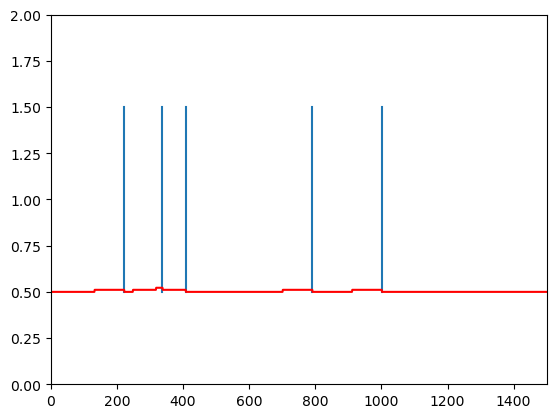

In [217]:
plt.plot()
plt.xlim(0,1500)
plt.ylim(0,2)
for i in range(len(class_pred[2,:])):
    if class_pred[2,:][i] == 1:
        plt.axvline(x=i,ymin=0.25,ymax=0.75) 
plt.plot(ag,'r')

In [216]:
ag=[]
cnt=0
for i in range(len(pred)):
    ag.append(sum(class_pred[2,:][cnt:cnt+90])/90+0.5)
    cnt+=1

In [121]:
for i in range(len(pred)):
    if pred[i] == 1:
        print(i)

11
21
40
48
71
81
86
87
102
147
149
154
165
184
198
203
204
205
210
212
217
218
221
230
231
243
248
269
271
272
275
282
287
293
318
319
320
328
332
333
335
336
341
347
350
355
359
360
363
365
367
373
375
376
386
391
398
399
402
403
407
412
415
417
426
429
430
433
436
437
440
446
448
449
458
460
464
467
473
476
479
485
486
487
492
494
496
505
507
508
510
520
522
523
525
526
534
544
546
549
557
559
562
563
566
567
568
572
574
577
584
594
601
604
605
607
610
612
615
620
626
629
635
637
638
643
653
654
655
657
661
666
680
684
685
686
688
689
693
695
696
697
698
699
711
715
716
717
722
724
730
733
736
743
746
748
750
756
758
761
764
772
773
775
777
781
790
791
799
800
802
803
807
812
813
816
817
820
825
829
831
837
844
847
849
856
857
860
861
865
872
873
875
878
881
894
896
899
904
907
908
913
914
917
921
925
926
930
932
935
937
938
939
943
948
952
953
955
956
959
966
969
972
974
977
978
979
991
992
994
999
1000
1001
1003
1007
1010
1020
1021
1022
1026
1027
1029
1030
1036
1038
1041
1042
1043

In [140]:
i=target_rate
x_train, x_test, y_train, y_test = train_test_split(data, i, test_size=0.3,shuffle=False , random_state=42)
model=svm.SVC(kernel='poly')
model.fit(x_train,np.array(y_train).ravel())
pred=model.predict(x_test)
pred

array([1, 0, 0, ..., 1, 0, 0])

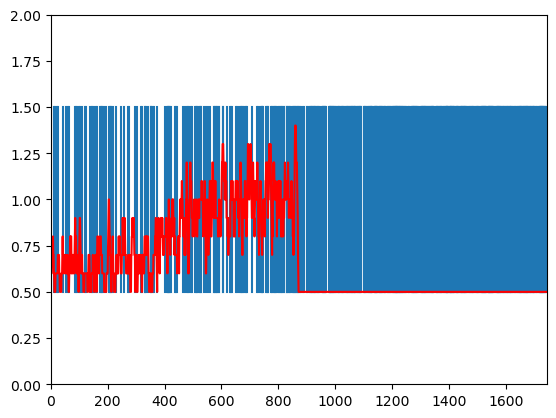

In [225]:
plt.plot()
plt.xlim(0,len(pred))
plt.ylim(0,2)
for i in range(len(pred)):
    if pred[i] == 1:
        plt.axvline(x=i,ymin=0.25,ymax=0.75) 
plt.plot(avg,'r')

In [271]:
#avg=[]
avg=np.random.rand(14).tolist()
cnt=0
for i in range(len(pred)):
    avg.append(sum(pred[cnt:cnt+30])/30+0.5)
    cnt+=1

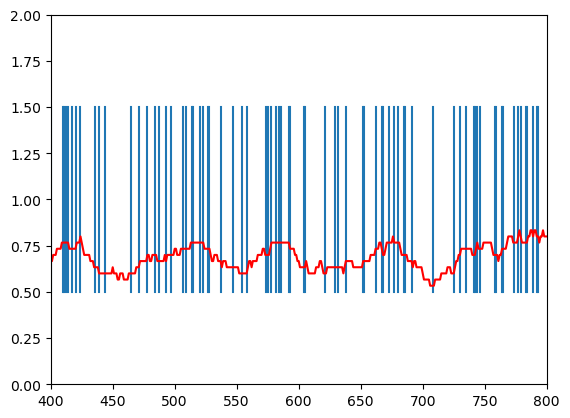

In [272]:
plt.plot()
plt.xlim(400,800)
plt.ylim(0,2)
for i in range(800):
    if pred[i] == 1:
        plt.axvline(x=i,ymin=0.25,ymax=0.75) 
plt.plot(avg,'r')

In [234]:
avg

[1,
 1,
 0.6,
 0.6,
 0.6,
 0.6,
 0.7,
 0.7,
 0.7,
 0.7,
 0.8,
 0.7,
 0.7,
 0.6,
 0.6,
 0.5,
 0.5,
 0.5,
 0.5,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6,
 0.6,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.6,
 0.6,
 0.6,
 0.7,
 0.8,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.7,
 0.7,
 0.7,
 0.6,
 0.6,
 0.5,
 0.5,
 0.6,
 0.6,
 0.6,
 0.8,
 0.8,
 0.7,
 0.8,
 0.8,
 0.6,
 0.6,
 0.6,
 0.6,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6,
 0.6,
 0.6,
 0.7,
 0.8,
 0.9,
 0.8,
 0.8,
 0.8,
 0.7,
 0.6,
 0.6,
 0.7,
 0.6,
 0.6,
 0.6,
 0.6,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 0.9,
 0.8,
 0.7,
 0.7,
 0.6,
 0.6,
 0.6,
 0.7,
 0.6,
 0.6,
 0.6,
 0.6,
 0.5,
 0.5,
 0.5,
 0.5,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.5,
 0.5,
 0.5,
 0.6,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.6,
 0.6,
 0.6,
 0.6,
 0.7,
 0.6,
 0.6,
 0.6,
 0.6,
 0.5,
 0.5,
 0.6,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6,
 0.5,
 0.7,
 0.7,
 0.8,
 0